In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('fraud.csv')
data=pd.DataFrame(data=data)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
data['Gender']=imp.fit_transform(data['Gender'].values.reshape(-1,1))
data['Married']=imp.fit_transform(data['Married'].values.reshape(-1,1))
data['Dependents']=imp.fit_transform(data['Dependents'].values.reshape(-1,1))
data['Self_Employed']=imp.fit_transform(data['Self_Employed'].values.reshape(-1,1))
data['LoanAmount']=imp.fit_transform(data['LoanAmount'].values.reshape(-1,1))
data['Loan_Amount_Term']=imp.fit_transform(data['Loan_Amount_Term'].values.reshape(-1,1))
data['Credit_History']=imp.fit_transform(data['Credit_History'].values.reshape(-1,1))

data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
le=LabelEncoder()
list1=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for val in list1:
    data[val]=le.fit_transform(data[val].astype(str))

In [6]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


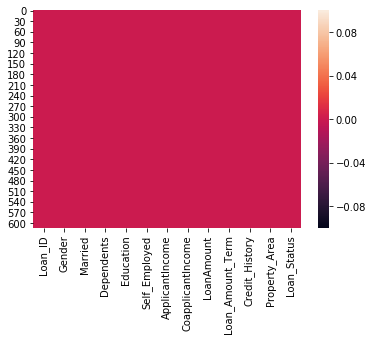

In [7]:
sns.heatmap(data.isnull())

In [8]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
x=data.iloc[:,0:13]
y=data.iloc[:,-1]

In [10]:
x.shape

(614, 13)

In [11]:
y.shape

(614,)

In [12]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.72,random_state=42)

In [13]:
train_x.shape

(171, 13)

In [14]:
test_x.shape

(443, 13)

In [15]:
train_y.shape

(171,)

In [16]:
test_y.shape

(443,)

In [17]:
lg=LogisticRegression()

In [18]:
lg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
pred=lg.predict(test_x)
print(pred)

[1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0
 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0
 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0
 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1
 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0]


In [20]:
print("accuracy score:",accuracy_score(pred,test_y))

accuracy score: 0.9954853273137697


In [21]:
print(confusion_matrix(test_y,pred))

[[141   2]
 [  0 300]]


In [22]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       143
           1       0.99      1.00      1.00       300

    accuracy                           1.00       443
   macro avg       1.00      0.99      0.99       443
weighted avg       1.00      1.00      1.00       443



In [23]:
gnb=GaussianNB()
gnb.fit(train_x,train_y)
predgnb=gnb.predict(test_x)
print(accuracy_score(test_y,predgnb))
print(confusion_matrix(test_y,predgnb))
print(classification_report(test_y,predgnb))

0.9909706546275395
[[139   4]
 [  0 300]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       143
           1       0.99      1.00      0.99       300

    accuracy                           0.99       443
   macro avg       0.99      0.99      0.99       443
weighted avg       0.99      0.99      0.99       443



In [24]:
svc=SVC(kernel='rbf')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predgnb))
print(confusion_matrix(test_y,predgnb))
print(classification_report(test_y,predgnb))

0.9909706546275395
[[139   4]
 [  0 300]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       143
           1       0.99      1.00      0.99       300

    accuracy                           0.99       443
   macro avg       0.99      0.99      0.99       443
weighted avg       0.99      0.99      0.99       443



In [25]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

1.0
[[143   0]
 [  0 300]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       300

    accuracy                           1.00       443
   macro avg       1.00      1.00      1.00       443
weighted avg       1.00      1.00      1.00       443



In [26]:
dtc=KNeighborsClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

0.6320541760722348
[[ 23 120]
 [ 43 257]]
              precision    recall  f1-score   support

           0       0.35      0.16      0.22       143
           1       0.68      0.86      0.76       300

    accuracy                           0.63       443
   macro avg       0.52      0.51      0.49       443
weighted avg       0.57      0.63      0.59       443



In [27]:
y_pred_prob=lg.predict_proba(test_x)[:,1]
y_pred_prob

array([0.94380676, 0.9511454 , 0.96562414, 0.96243253, 0.9497231 ,
       0.95852884, 0.96631569, 0.96550897, 0.14986494, 0.20576597,
       0.08862727, 0.94906793, 0.93845084, 0.95400018, 0.97616755,
       0.96984033, 0.95178297, 0.94936033, 0.9617786 , 0.98256606,
       0.95484622, 0.963446  , 0.91338017, 0.95520212, 0.97276926,
       0.94224662, 0.94364725, 0.11587533, 0.98618393, 0.98832171,
       0.97317271, 0.97607538, 0.94059334, 0.9466012 , 0.15715967,
       0.03454971, 0.13508003, 0.97021183, 0.97075651, 0.28812648,
       0.94738397, 0.9481549 , 0.15577201, 0.95071228, 0.95428632,
       0.95537713, 0.17150314, 0.06161043, 0.05385699, 0.07401311,
       0.10084869, 0.15717188, 0.05118066, 0.1248057 , 0.95829119,
       0.14033416, 0.13211935, 0.9599912 , 0.06203902, 0.95877797,
       0.94224905, 0.1737275 , 0.07973217, 0.95955153, 0.9687665 ,
       0.96356913, 0.97812774, 0.96544033, 0.22699658, 0.10374165,
       0.06177081, 0.95936495, 0.1233611 , 0.1760689 , 0.13585

In [28]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)

In [29]:
fpr

array([0., 0., 0., 1.])

In [30]:
tpr

array([0.        , 0.00333333, 1.        , 1.        ])

In [31]:
thresholds

array([1.99384278, 0.99384278, 0.86431042, 0.02297876])

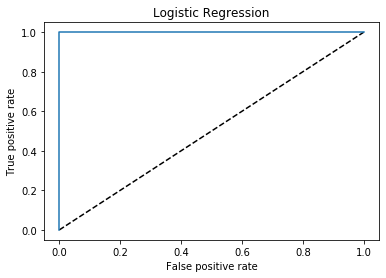

In [32]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score


In [34]:
auc_score=roc_auc_score(test_y,lg.predict(test_x))


In [35]:
print(auc_score)

0.993006993006993


In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [37]:
rfr.score(train_x,train_y)

1.0

In [38]:
rfr=RandomForestRegressor(n_estimators=100,random_state=46)
rfr.fit(train_x,train_y)
rfr.score(train_x,train_y)

1.0

In [39]:
rfr=RandomForestRegressor(n_estimators=400,random_state=56)
rfr.fit(train_x,train_y)
rfr.score(train_x,train_y)

1.0

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
gbr=GradientBoostingRegressor(n_estimators=100,random_state=46)
gbr.fit(train_x,train_y)
gbr.score(train_x,train_y)

0.9999995153074965

In [42]:
gbr=GradientBoostingRegressor(n_estimators=500,random_state=76)
gbr.fit(train_x,train_y)
gbr.score(train_x,train_y)

0.9999995153074965